In [1]:
import pandas as pd

In [2]:
airbnb = pd.read_csv('data/airbnb.csv')

In [3]:
airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [4]:
airbnb.room_type.value_counts()

Entire home/apt    9764
Private room       3297
Shared room         171
Name: room_type, dtype: int64

In [5]:
airbnb.room_type.value_counts(normalize=True).plot.barh();

In [6]:
airbnb.room_id.value_counts().head()

4524031     1
17331115    1
5568673     1
17187773    1
5464935     1
Name: room_id, dtype: int64

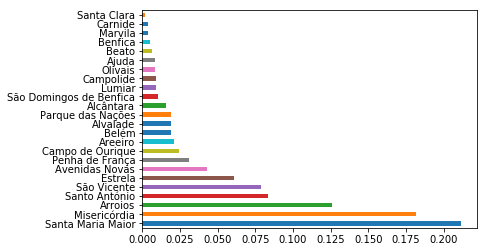

In [7]:
airbnb.neighborhood.value_counts(normalize=True).plot.barh();

In [8]:
n_records = len(airbnb)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(airbnb)

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0007557436517533253 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64


In [9]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(airbnb)

room_id | 0 | int64
host_id | 0 | int64
reviews | 296 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 121 | float64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


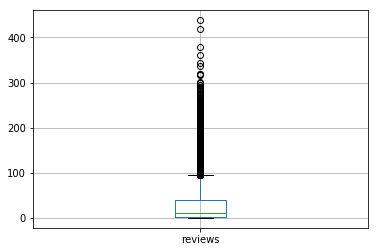

In [10]:
airbnb.boxplot('reviews');

In [11]:
airbnb.accommodates.value_counts().tail()

12    64
11    37
14    22
15    18
13    10
Name: accommodates, dtype: int64

In [12]:
airbnb.drop(columns=['room_id']).head()

,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [13]:
airbnb.host_id.value_counts().head()

3953109      171
1756107       98
106149355     86
2174752       68
2010790       63
Name: host_id, dtype: int64

In [14]:
airbnb_by_neigh = airbnb.groupby(['neighborhood'], as_index=False)['price'].mean()
airbnb_by_neigh.head()

,neighborhood,price
0,Ajuda,63.435185
1,Alcântara,72.582160
2,Alvalade,70.098814
3,Areeiro,93.796429
4,Arroios,73.039663


In [18]:
airbnb['reviews_type'] = "None"
airbnb['reviews_type'][(airbnb['reviews'] <=10)] = "Some"
airbnb['reviews_type'][(airbnb['reviews'] <=50)] = "Many"
airbnb['reviews_type'][(airbnb['reviews'] > 50)] = "Wow"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
airbnb.reviews_type = airbnb.reviews_type.astype("category")

In [20]:
airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,reviews_type
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,Many
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,Many
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,Wow
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,Wow
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,Wow


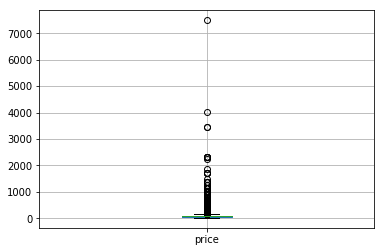

In [21]:
airbnb.boxplot('price');